Cálculo de función de cinemática inversa del robot animatrónico T-Rex

Se hace uso de las librerias de Tensorflow, y las API relacionadas:
Keras: para el diseño y entrenamiento de redes neuronales
Pandas: para el procesamientos de datos
Numpy: para la manipulación y algebra de vectores y matrices
Protlib: para representar graficamente los resultados

A continuación se importan dischas librerias


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import io
from google.colab import drive
from google.colab import files
from keras.optimizers import Adam


Se realiza la carga de los datos de entrada y salidas almacenados en un archivos separado por comas (CSV)

In [ ]:
uploaded = files.upload()

Saving mediciones_CI_CD_pos.csv to mediciones_CI_CD_pos.csv


A continuación se descarga la información y se pasan a las variables de entrada y salida, a su vez se dividen en grupos de entrenamiento y prueba

In [ ]:
file_df = pd.read_csv(io.BytesIO(uploaded['mediciones_CI_CD_pos.csv']), sep=';')

csv_df = file_df.sample(frac=0.95, random_state=123)
test_df = file_df.drop(csv_df.index)

l1_df = csv_df['L1']
l2_df = csv_df['L2']
x_df = csv_df['X']
y_df = csv_df['Y']

outputs = np.column_stack((l1_df, l2_df))
inputs = np.column_stack((x_df, y_df))



l1 = test_df['L1']
l2 = test_df['L2']
x = test_df['X']
y = test_df['Y']

test_out = np.column_stack((l1, l2))
test_in = np.column_stack((x, y))

In [ ]:
from numpy.random import shuffle
from keras.optimizers import Adam

Creación de las funciones que crean el modelo de red neuronal con la siguiente configuración:
Capa de entrada, 2 capas ocultas, capa de salida. Con las siguientes características:
Capa de entrada: 5000 nodos. Función de activación ReLU
Capa oculta 1: 1550 nodos. Función de activación ReLU
Capa oculta 2: 250 nodos. Función de activación ReLU
Capa de salida: Función de activación Lineal

La segunda función es la función de entrenamiento, cuyos argumentos son los siguiente:

@model: modelo creado anteriormente
@input_var: variable de entrada (X, Y)
@output_var: variable de salida (L1, L2)
@epochs: cantidad de iteraciones que se realizan en el entrenamiento
@batch: tamaño del grupo de variables que se utiliza en cada iteración

In [ ]:
def create_model(in_dim, out_dim):
  model = tf.keras.models.Sequential()

  model.add(tf.keras.layers.Dense(units=5000, input_shape=[in_dim], activation='relu'))
  model.add(tf.keras.layers.Dense(1550, activation='relu'))
  model.add(tf.keras.layers.Dense(250, activation='relu'))
  model.add(tf.keras.layers.Dense(out_dim, activation='linear'))

  model.compile(loss = 'mean_squared_error', optimizer = 'adam')

  return model

def train_model(model, input_var, output_var, epochs, batch):

  hist = model.fit(input_var, output_var, epochs = epochs, batch_size= batch, shuffle= True, verbose = 0)
  scores = model.evaluate(input_var, output_var)

  return hist

Llamada a las funciones para crear y entrenar el modelo
Luego se almacenan los resultados en la variable 'modelo´
y en el objeto 'hist'

In [ ]:
modelo = create_model(2, 2)
hist = train_model(model=modelo,
            input_var=inputs,
            output_var=outputs,
            epochs=10000,
            batch=15)

4/4 [==============================] - 0s 4ms/step - loss: 3.4196


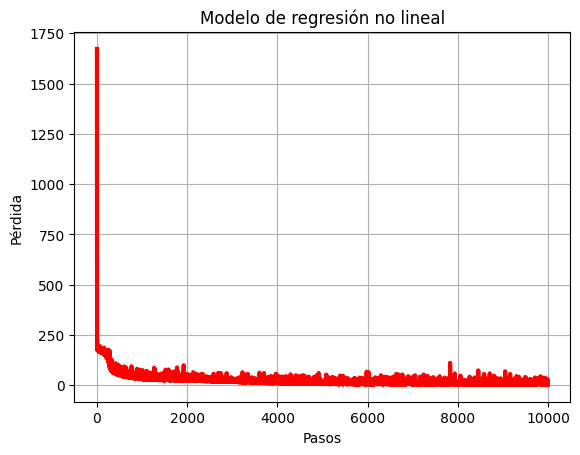

In [ ]:
plt.plot(hist.history['loss'], linewidth=3, color='r')
plt.title('Modelo de regresión no lineal')
plt.xlabel('Pasos')
plt.ylabel('Pérdida')
#plt.ylim(-10, 100)
plt.grid()
plt.show()

In [ ]:
test = np.array([[129, 193],[144, 205],[194, 258],[138, 150],[251,217],[159,105],[296,225],[218, 120],[229, 122],[318, 137],[318,115],[361, 108]])
result = np.array([[0, 35],[5, 40],[5, 10],[10, 30],[15, 15],[20, 45],[25, 0],[30, 50],[35, 20],[40, 30],[45, 25],[50, 15]])

result

array([[ 0, 35],
       [ 5, 40],
       [ 5, 10],
       [10, 30],
       [15, 15],
       [20, 45],
       [25,  0],
       [30, 50],
       [35, 20],
       [40, 30],
       [45, 25],
       [50, 15]])

In [ ]:
pred = modelo.predict(inputs)

4/4 [==============================] - 0s 2ms/step


In [ ]:
pred

array([[1.3114095e-02, 3.3736187e+01],
       [5.0901642e+00, 4.0459103e+01],
       [5.0423789e+00, 1.0933862e+01],
       [1.0198576e+01, 2.8196810e+01],
       [1.5788500e+01, 1.4838564e+01],
       [2.0110754e+01, 4.4905968e+01],
       [2.5252930e+01, 2.5680299e+00],
       [3.0700968e+01, 5.0549522e+01],
       [3.4374290e+01, 2.2252314e+01],
       [4.0320343e+01, 2.9468082e+01],
       [4.4696568e+01, 2.8878458e+01],
       [5.0344276e+01, 1.6274006e+01]], dtype=float32)

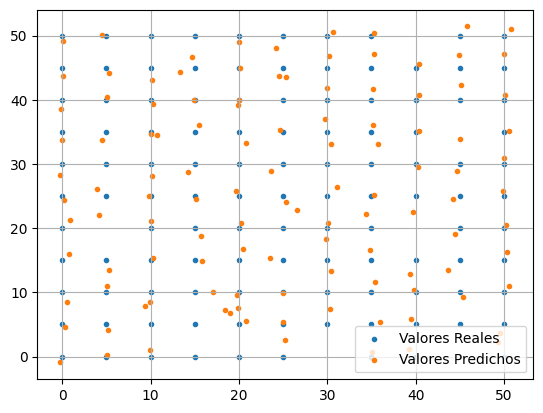

In [ ]:
plt.scatter(outputs[:,0], outputs[:,1], marker='.', label='Valores Reales')
plt.scatter(pred[:,0], pred[:,1], marker='.', label='Valores Predichos')
plt.grid()
plt.legend(loc='lower right')

In [ ]:
modelo.save('T_Rex_CI_modelo')